In [1]:
%pylab inline
rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


In [173]:
import numpy
import scipy
from scipy import signal
from scipy import ndimage
from scipy import misc

In [67]:
rampImg = ndimage.imread('./data/ramp.png') / 255.0
flatImg = ndimage.imread('./data/flat.png') / 255.0
smallMaskImg = ndimage.imread('./data/small_mask.png') / 255.0

In [154]:
def laplacian(image):
    mat = np.array([[0., -1., 0.], [-1., 4., -1.], [0., -1., 0.]])
    
    r = scipy.ndimage.filters.convolve(image[:, :, 0], mat)
    g = scipy.ndimage.filters.convolve(image[:, :, 1], mat)
    b = scipy.ndimage.filters.convolve(image[:, :, 2], mat)
    
    result = numpy.copy(image)
    result[:, :, 0] = r
    result[:, :, 1] = g
    result[:, :, 2] = b
    
    return scipy.ndimage.filters.laplace(image)
    
    return result

In [155]:
def dotIm(im1, im2):
    return sum(im1 * im2)

In [156]:
def poisson(bg, fg, mask, niter):
    mask = mask[:, :, 0:3]
    
    b = laplacian(fg)
    x = bg * (1.0 - mask)
    
    for i in range(niter):
        r = (b - laplacian(x)) * mask
        alpha = dotIm(r, r) / dotIm(r, laplacian(r))
        x = x + alpha * r
    
    return x

In [157]:
poissonResult1 = poisson(rampImg, flatImg, smallMaskImg, 0)
poissonResult2 = poisson(rampImg, flatImg, smallMaskImg, 50)
poissonResult3 = poisson(rampImg, flatImg, smallMaskImg, 100)
poissonResult4 = poisson(rampImg, flatImg, smallMaskImg, 200)

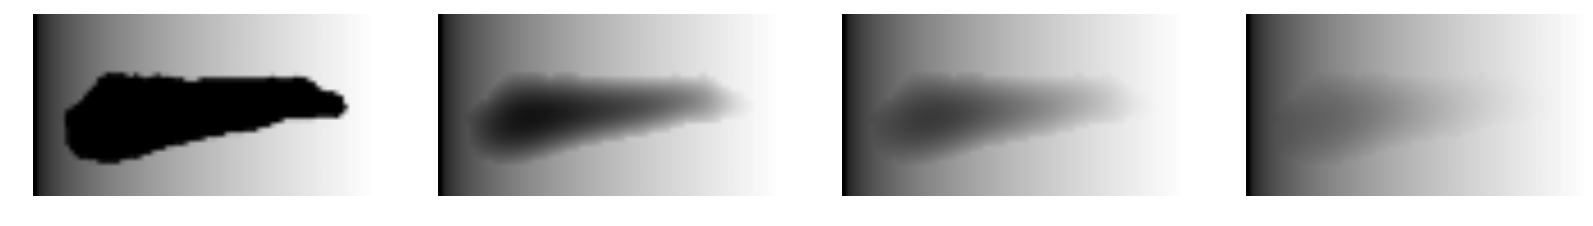

In [158]:
pyplot.subplot(1, 4, 1)
pyplot.axis('off')
pyplot.imshow(poissonResult1)

pyplot.subplot(1, 4, 2)
pyplot.axis('off')
pyplot.imshow(poissonResult2)

pyplot.subplot(1, 4, 3)
pyplot.axis('off')
pyplot.imshow(poissonResult3)

pyplot.subplot(1, 4, 4)
pyplot.axis('off')
pyplot.imshow(poissonResult4)

In [159]:
bearImg = ndimage.imread('./data/bear.png') / 255.0
bearMaskImg = ndimage.imread('./data/bear_mask.png') / 255.0
waterpoolImg = ndimage.imread('./data/waterpool.png') / 255.0

In [160]:
def poissonComposite(bg, fg, mask, y, x, niter):
    fgWidth = fg.shape[1]
    fgHeight = fg.shape[0]
    
    bgSlice = bg[y : y + fgHeight, x : x + fgWidth, :]
    
    result = numpy.copy(bg)
    resultSlice = poisson(bgSlice, fg, mask, niter)
    result[y : y + fgHeight, x : x + fgWidth, :] = resultSlice
    
    return result

In [167]:
result1 = poissonComposite(waterpoolImg, bearImg, bearMaskImg, 10, 10, 200)
result2 = poissonComposite(waterpoolImg, bearImg, bearMaskImg, 10, 10, 1000)
result3 = poissonComposite(waterpoolImg, bearImg, bearMaskImg, 10, 10, 15000)

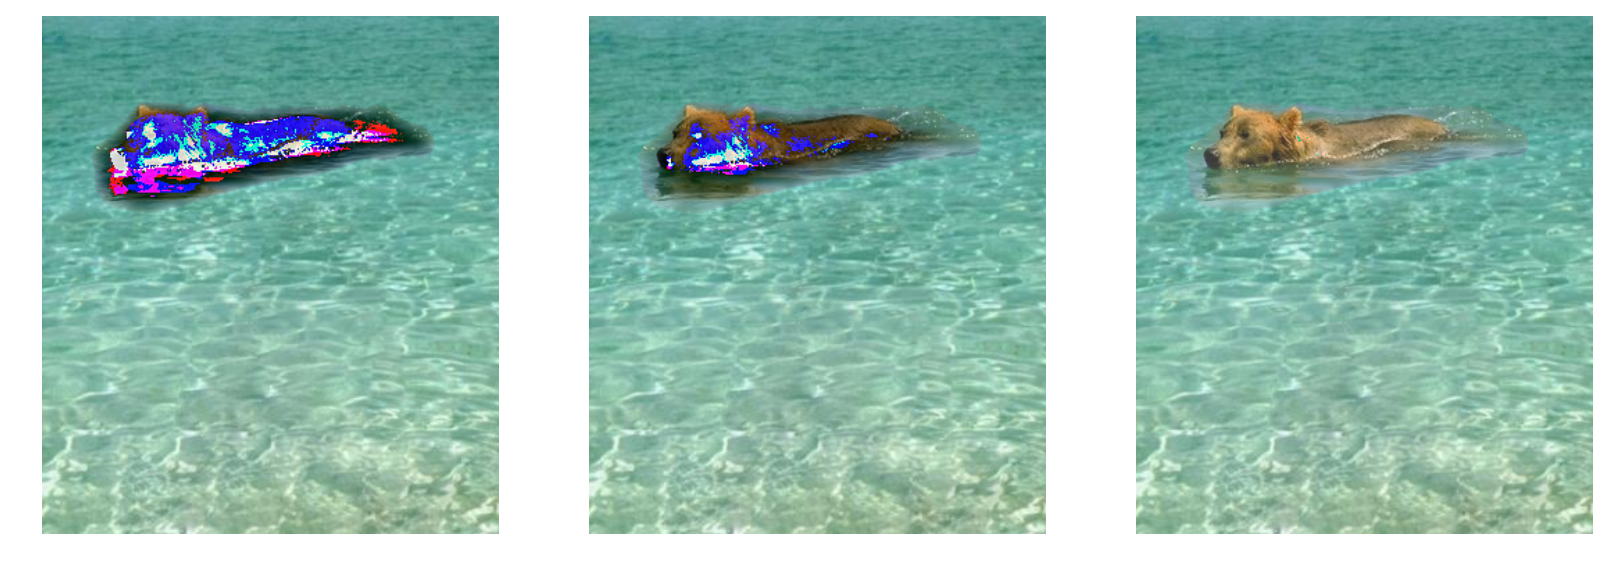

In [168]:
pyplot.subplot(1, 3, 1)
pyplot.axis('off')
pyplot.imshow(result1)

pyplot.subplot(1, 3, 2)
pyplot.axis('off')
pyplot.imshow(result2)

pyplot.subplot(1, 3, 3)
pyplot.axis('off')
pyplot.imshow(result3)

In [169]:
result4 = poissonComposite(waterpoolImg, bearImg, bearMaskImg, 100, 10, 200)
result5 = poissonComposite(waterpoolImg, bearImg, bearMaskImg, 100, 10, 1000)
result6 = poissonComposite(waterpoolImg, bearImg, bearMaskImg, 100, 10, 15000)

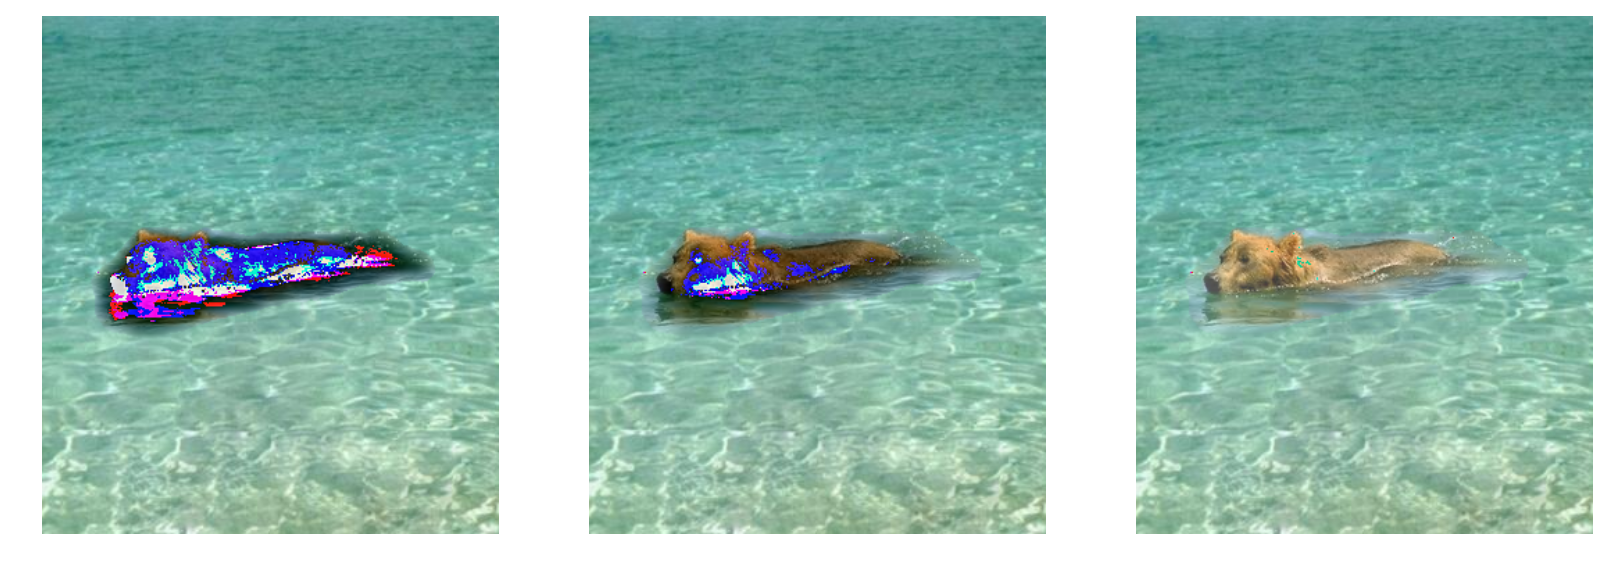

In [170]:
pyplot.subplot(1, 3, 1)
pyplot.axis('off')
pyplot.imshow(result4)

pyplot.subplot(1, 3, 2)
pyplot.axis('off')
pyplot.imshow(result5)

pyplot.subplot(1, 3, 3)
pyplot.axis('off')
pyplot.imshow(result6)

In [171]:
result7 = poissonComposite(waterpoolImg, bearImg, bearMaskImg, 50, 30, 200)
result8 = poissonComposite(waterpoolImg, bearImg, bearMaskImg, 50, 30, 1000)
result9 = poissonComposite(waterpoolImg, bearImg, bearMaskImg, 50, 30, 15000)

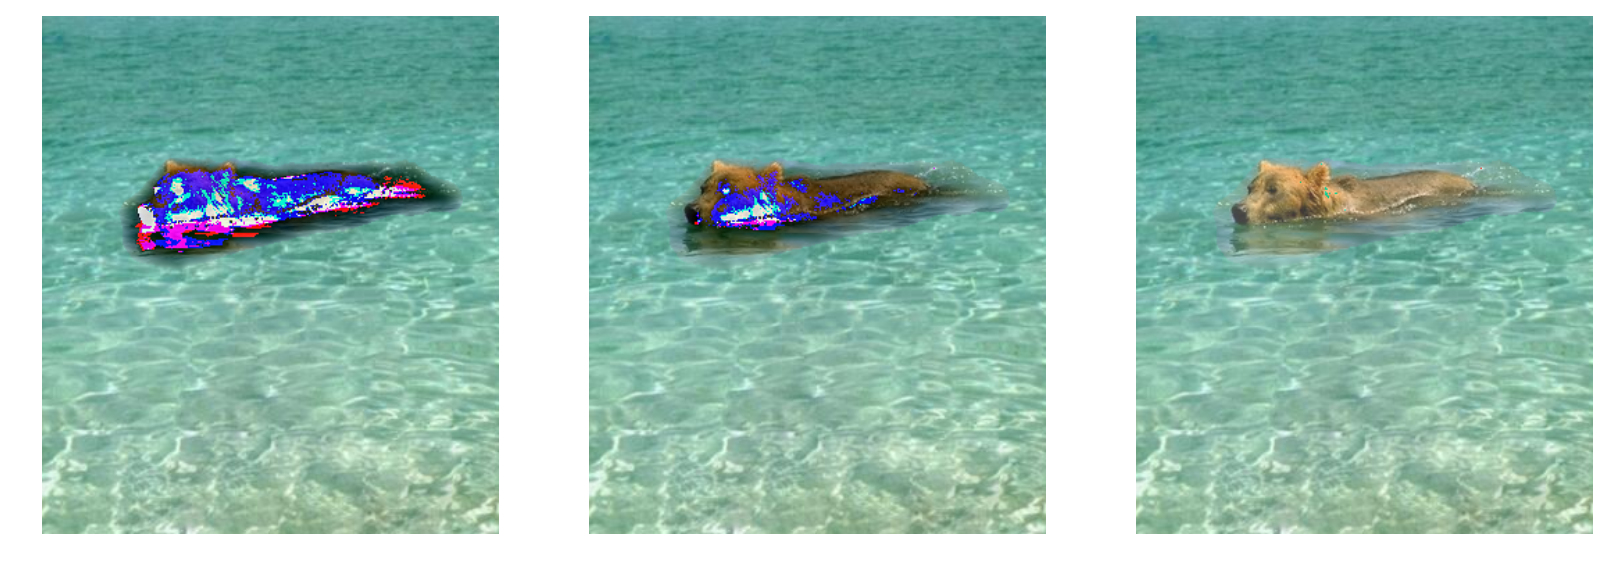

In [172]:
pyplot.subplot(1, 3, 1)
pyplot.axis('off')
pyplot.imshow(result7)

pyplot.subplot(1, 3, 2)
pyplot.axis('off')
pyplot.imshow(result8)

pyplot.subplot(1, 3, 3)
pyplot.axis('off')
pyplot.imshow(result9)

In [175]:
misc.imsave('./results/poisson/10_10_200.png', result1)
misc.imsave('./results/poisson/10_10_1000.png', result2)
misc.imsave('./results/poisson/10_10_15000.png', result3)
misc.imsave('./results/poisson/100_10_200.png', result4)
misc.imsave('./results/poisson/100_10_1000.png', result5)
misc.imsave('./results/poisson/100_10_15000.png', result6)
misc.imsave('./results/poisson/50_30_200.png', result7)
misc.imsave('./results/poisson/50_30_1000.png', result8)
misc.imsave('./results/poisson/50_30_15000.png', result9)